In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate

# Численное решение задачи Коши

Найти приближенное решение задачи Коши для обыкновенного дифференциального уравнения (ОДУ) 1 порядка

$$\begin{cases}
y'(t) = -\frac{y}{2t}+t^2,~ t\in[1, 2]\\
y(1)=1
\end{cases}$$

и оценить погрешность решения задачи.

In [143]:
y0 = 1
t0 = 1
T = 2
h = 0.1
N = int((T - t0) / h) # число узлов сетки

In [144]:
def f(t, y):
    return -y / (2 * t) + t**2

def f1(x):
    return (2 * x**3) / 7 + 5 / (7 * np.sqrt(x))

def eyler(f, t, y, h):
    y_next = y + h * f(t, y)
    return y_next

def RK4(f, t, y, h):
    k1 = h * f(t,y)
    k2 = h * f(t + h/2, y + k1 * h/2)
    k3 = h * f(t + h/2, y + k2 * h/2)
    k4 = h * f(t + h, y + k3 * h)
    y_next = y + (k1 + 2*k2 + 2*k3 + k4)/6
    return y_next

def state(method, f, t0, y0, T, h):
    N = int((T - t0) / h)

    states = [[],[]]

    states[0].append(t0)
    states[1].append(y0)

    for i in range(N):
        t = states[0][i]
        y = states[1][i]
        
        t_next = t + h
        y_next = method(f, t, y, h)

        states[0].append(t_next)
        states[1].append(y_next)
    return states

In [151]:
states = state(eyler, f, t0=1, y0=1, T=2, h=0.1)
states1 = state(RK4, f, t0=1, y0=1, T=2, h=0.1)

In [152]:
sol = []
for elem in states1[0]:
    sol.append(f1(elem))

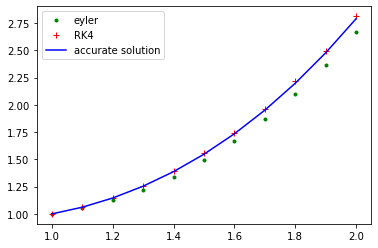

In [156]:
# plt.figure(figsize=(10,8), dpi=300)
plt.plot(states[0], states[1], '.', c='green', label='eyler')
plt.plot(states1[0], states1[1], '+', c='red', label='RK4')
plt.plot(states1[0], sol, c='blue', label='accurate solution')
plt.legend()
# plt.savefig('2.jpg')
plt.show()

In [154]:
np.abs(np.array(sol) - np.array(states[1])).max()

0.12274254909896021

In [158]:
np.abs(np.array(sol) - np.array(states1[1])).max()

0.022019101902992944

In [157]:
data = {'eyler': states[1], 'RK4': states1[1], 'accurate solution': sol}
pd.DataFrame(data, index=states[0])

,eyler,RK4,accurate solution
1.0,1.000000,1.000000,1.000000
1.1,1.050000,1.062542,1.061330
1.2,1.123273,1.148474,1.145765
1.3,1.220470,1.258635,1.254184
1.4,1.342529,1.394093,1.387682
1.5,1.490581,1.556068,1.547498
1.6,1.665895,1.745894,1.734978
1.7,1.869836,1.964986,1.951546
1.8,2.103841,2.214816,2.198683
1.9,2.369401,2.496906,2.477912


In [159]:
states_h = state(eyler, f, t0=1, y0=1, T=2, h=0.05)
states1_h = state(RK4, f, t0=1, y0=1, T=2,h= 0.05)

In [160]:
eps = np.abs((np.array(states_h[1][::2]) - np.array(states[1])) / (2**4 - 1)).max()
eps1 = np.abs((np.array(states1_h[1][::2]) - np.array(states1[1])) / (2**4 - 1)).max()

In [162]:
print('error rate eyler:', eps, 'error rate RK4:', eps1)

error rate eyler: 0.004097860428800093 error rate RK4: 0.0006835215221965285


In [141]:
h = 0.1
for i in range(1, 10):
    h = h/2
    s = state(eyler, f, t0=1, y0=1, T=2, h=h)
    print('step h:', h, ', error rate:', np.abs(np.array(sol) - np.array(s[1][::2**i])).max(), '\n')

step h: 0.05 , error rate: 0.06127464266695881 

step h: 0.025 , error rate: 0.03061442239660339 

step h: 0.0125 , error rate: 0.015301640763330404 

step h: 0.00625 , error rate: 0.007649446867984189 

step h: 0.003125 , error rate: 0.0038243824304413643 

step h: 0.0015625 , error rate: 0.0019121062605500505 

step h: 0.00078125 , error rate: 0.0009560319285970564 

step h: 0.000390625 , error rate: 0.00047801066805330805 

step h: 0.0001953125 , error rate: 0.0002390040104622848 



Решить приближенную задачу Коши для ОДУ 1-го порядка вида (1), используя метод Рунге-Кутты 4-го порядка точности и модифицированный метод Эйлера 2-го порядка с шагами $h$ и $\frac{h}{2}$. Для каждого мтеода оценить погрешность по правилу Рунге и вычислить уточненное решение. Построить на одном чертеже графики приближенных решений.

\begin{equation*}
    \begin{cases}
        f(t,y)=-4t^3y+4(1-t^3)e^{4t}y^2, t\in [0, 1]\\
        y(0)=-1
    \end{cases}
\end{equation*}

In [164]:
t0 = 0
T = 1
y0 = -1
h = 0.1
N = int((T - t0) / h) # число узлов сетки

def g(t, y):
    return -4 * t**3 * y + 4 * (1 - t**3) * np.e**(4 * t) * y**2

def g1(x):
    return -1 / (np.e**(4 * x))

In [165]:
def eyler_mod(f, t, y, h):
    y_next = y + h / 2 * (f(t, y) + f(t + h, y + h * f(t, y)))
    return y_next

In [166]:
states2 = state(RK4, g, t0=0, y0=-1, T=1, h=0.1)
states3 = state(RK4, g, t0=0, y0=-1, T=1, h=0.05)
states4 = state(eyler_mod, g, t0=0, y0=-1, T=1, h=0.1)
states5 = state(eyler_mod, g, t0=0, y0=-1, T=1, h=0.05)

In [184]:
eps_RK = np.abs((np.array(states3[1][::2]) - np.array(states2[1])) / (2**4 - 1))
eps_eyler_mod = np.abs((np.array(states5[1][::2]) - np.array(states4[1])) / (2**4 - 1))
print('error RK4:', eps_RK, 'error modified eyler:', eps_eyler_mod)

error RK4: [0.         0.00576931 0.00426477 0.00287579 0.00191386 0.00128055
 0.00086719 0.00059663 0.00041863 0.000301   0.00022296] error modified eyler: [0.         0.00117366 0.0014202  0.00128645 0.00103453 0.00077958
 0.00056444 0.00039867 0.00027814 0.00019439 0.00013882]


In [179]:
updated_RK = np.array(states3[1][::2]) + np.array(eps_RK)
updated_eyler_mod = np.array(states5[1][::2]) + np.array(eps_eyler_mod)

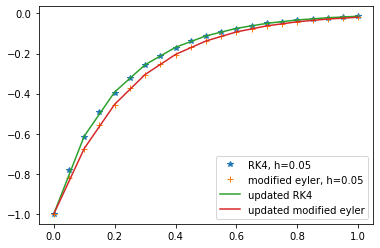

In [186]:
# plt.figure(figsize=(10,8), dpi=300)
# plt.plot(states2[0], states2[1], '.', label='RK4, h=0.1')
plt.plot(states3[0], states3[1], '*', label='RK4, h=0.05')
# plt.plot(states4[0], states4[1], '^', label='modified eyler, h=0.1')
plt.plot(states5[0], states5[1], '+', label='modified eyler, h=0.05')
plt.plot(states2[0], updated_RK, label='updated RK4')
plt.plot(states2[0], updated_eyler_mod, label='updated modified eyler')
# plt.plot(np.linspace(0, 1, 1000), g1(np.linspace(0, 1, 1000)), label='accurate solution')
plt.legend()
# plt.savefig('3.jpg')
plt.show()

Решить приближенную задачу Коши для ОДУ 1-го порядка с помощью метода Рунге-Кутты 3-го порядка I с точностью $\varepsilon=10^{-4}$. При нахождении решения использовать алгоритм автоматического выбора шага.

\begin{equation*}
\begin{cases}
    f(t, y)=-\frac{1}{3}y\sqrt{t}+\frac{2}{3}y^2\sin t, t\in [2, 10]\\
    y(2)=2.2
\end{cases}
\end{equation*}

Метод Рунге-Кутты 3-го порядка I:

\begin{equation*}
    \begin{aligned}
        &k_1=hf(t_n, y_n)\\
        &k_2=hf(t_n+\frac{h}{2}, y_n+\frac{k_1}{2})\\
        &k_3=hf(t_n+h, y_n-k_1+2k_2)\\
        &y_{n+1}=y_n+\frac{1}{6}(k_1+4k_2+k_3)
    \end{aligned}
\end{equation*}

In [305]:
t0 = 2
T = 10
y0 = 2.2
h = 0.1

def d(t, y):
    return -1 / 3 * y * np.sqrt(t) + 2 / 3 * y**2 * np.sin(t)

In [310]:
def RK4I(f, t, y, h):
    k1 = h * f(t, y)
    k2 = h * f(t + h / 2, y + k1 / 2)
    k3 = h * f(t + h, y - k1 + 2 * k2)
    y_next = y + 1 / 6 * (k1 + 4 * k2 + k3)
    return y_next

In [363]:
def adaptive_RK4(f, t0, y0, T, eps):
    h = 0.2
    K = 100
    states = [[],[],[]]
    
    states[0].append(t0)
    states[1].append(y0)
    states[2].append(h)

    for i in range(100):
        
        if states[0][-1] >= T:
            break
            
        t = states[0][i]
        y = states[1][i]
        h = states[2][i]
        
        y1 = RK4I(f, t, y, h)
        y2 = RK4I(f, t, y, h / 2)
        y3 = RK4I(f, t + h/2, y2, h / 2)
        
        delta = np.abs(y1 - y3)
        
        if delta <= eps/K:
            h_next = h * 2
            t_next = states[0][-1] + h_next
            y_next = RK4I(f, t, y, h)
            states[0].append(t_next)
            states[1].append(y_next)
            states[2].append(h_next)
        
        elif delta <= eps:
            t_next = states[0][-1] + h
            y_next = RK4I(f, t, y, h)
            states[0].append(t_next)
            states[1].append(y_next)
            states[2].append(h)
            
        else:
            h_next = h / 2
            t_next = states[0][-1] + h_next
            y_next = RK4I(f, t, y, h)
            states[0].append(t_next)
            states[1].append(y_next)
            states[2].append(h_next)

    return states

In [364]:
states6 = adaptive_RK4(d, t0=2, y0=2.2, T=10, eps=10e-4)
states_new = [states6[i][:-1] for i in range(3)]

In [368]:
for_df = {'step h': states_new[2], 'approximate solution': states_new[1]}
df = pd.DataFrame(for_df, index=states_new[0])
df
# df.iloc[2]
# df['step h']

,step h,approximate solution
2.0,0.2,2.200000
2.2,0.2,2.631844
2.4,0.2,3.166276
2.6,0.2,3.749278
2.7,0.1,4.217262
2.8,0.1,4.456214
2.9,0.1,4.594700
3.0,0.1,4.600768
3.1,0.1,4.463194
3.2,0.1,4.197534


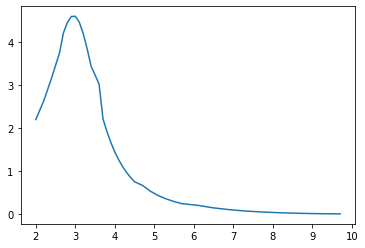

In [371]:
# plt.figure(dpi=300)
plt.plot(states_new[0], states_new[1])
# plt.savefig('5.jpg')
plt.show()